#Evghenii Gaisinschii 336551072
#Eugene Golovanov 323554121

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from autocorrect import Speller
from spellchecker import SpellChecker
import time
from datetime import datetime 
import spacy
from textblob import TextBlob 

from nltk.corpus import words
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams
from nltk.metrics.distance  import edit_distance

from nltk.stem import PorterStemmer 
from textblob import Word 
from nltk.stem import WordNetLemmatizer 

import wordcloud
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import squarify 
import seaborn as sns

start_program = datetime.now() 

#Part1.2

## NLTK

Features

    Text Analytics and NLP
    Compare Text Analytics, NLP and Text Mining
        Text Analysis Operations using NLTK
        Tokenization
        Stopwords
        Lexicon Normalization such as Stemming and Lemmatization
        POS Tagging
    Sentiment Analysis
    Text Classification
    Performing Sentiment Analysis using Text Classification

## TextBlob 1.2.1


Features

    Noun phrase extraction
    Part-of-speech tagging
    Sentiment analysis
    Classification (Naive Bayes, Decision Tree)
    Language translation and detection powered by Google Translate
    Tokenization (splitting text into words and sentences)
    Word and phrase frequencies
    Parsing
    n-grams
    Word inflection (pluralization and singularization) and lemmatization
    Spelling correction
    Add new models or languages through extensions
    WordNet integration

## cpaCy 1.2.1

Features

    Non-destructive tokenization
    Named entity recognition
    Support for 50+ languages
    pretrained statistical models and word vectors
    State-of-the-art speed
    Easy deep learning integration
    Part-of-speech tagging
    Labelled dependency parsing
    Syntax-driven sentence segmentation
    Built in visualizers for syntax and NER
    Convenient string-to-hash mapping
    Export to numpy data arrays
    Efficient binary serialization
    Easy model packaging and deployment
    Robust, rigorously evaluated accuracy

In [2]:
# #Execute time
ttw = pd.read_csv('ttw2_finalSpell.csv')
ttw.dropna(inplace=True)

In [3]:
# #Execute time
start_time = datetime.now() 
stop_words = set(stopwords.words('english'))
ttw2 = ttw.copy()
ttw.dropna(inplace=True)
ttw2['tweet'] = ttw2['tweet'].str.lower()
ttw2['tweet'] = ttw2['tweet'].str.replace('[^\w\s]','') 
ttw2['tweet'] = ttw2['tweet'].str.replace('[^a-z ]','') 
ttw2['tweet'] = ttw2['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))


ttw2.head(20)

Time elapsed in (hh:mm:ss.ms): "0:00:00.225842"


id  label                                              tweet
0    1      0  user father dysfunctional selfish drags kids d...
1    2      0  user user thanks credit cant use cause dont of...
2    3      0                                   birthday majesty
3    4      0                        model love u take u time ur
4    5      0                                 factsguide society
5    6      0  huge fan fare big talking leave chaos pay disp...
6    7      0  user camping tomorrow user user user user user...
7    8      0             next school year year exams cant think
8    9      0                                          love land
9   10      0                               user user welcome im
10  11      0      consumer price index mom climbed previous may
11  12      0                                            selfish
12  13      0                                get see daddy today
13  14      1          user calls middle school build wall chant
14  15      1                                            comment
15  16      0                                ouchjunior angrygot
16  17      0                                     thankful paper
17  18      1                                              agree
18  19      0         smiles around via ig user user make people
19  20      0                 know essential oils made chemicals

In [4]:
ttw3 = ttw2.copy()
ttw3.dropna(inplace=True)

In [5]:
#TOKENIZATION WITH NLTK

#Execute time
start_time = datetime.now() 
#print(ttw3['tweet'][3351])
for i in range(len(ttw3['tweet'][:10])):
    word_data =  ttw3['tweet'][i]
    nltk_tokens = nltk.word_tokenize(word_data)
    print(nltk_tokens)
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))



['user', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction']
['user', 'user', 'thanks', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'px']
['birthday', 'majesty']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['factsguide', 'society']
['huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get']
['user', 'camping', 'tomorrow', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'danny']
['next', 'school', 'year', 'year', 'exams', 'cant', 'think']
['love', 'land']
['user', 'user', 'welcome', 'im']
Time elapsed in (hh:mm:ss.ms): "0:00:00.021990"


In [6]:

#TOKENIZATION WITH TEXTBLOB

#Execute time
start_time = datetime.now() 
#ttw3.dropna(inplace=True)
for i in range(len(ttw3['tweet'][:10])):
    text = ttw3['tweet'][i]
    blob_object = TextBlob(text) 
    print(blob_object.words)
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

['user', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction']
['user', 'user', 'thanks', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'px']
['birthday', 'majesty']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['factsguide', 'society']
['huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get']
['user', 'camping', 'tomorrow', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'danny']
['next', 'school', 'year', 'year', 'exams', 'cant', 'think']
['love', 'land']
['user', 'user', 'welcome', 'im']
Time elapsed in (hh:mm:ss.ms): "0:00:00.009995"


In [7]:
#TOKENIZATION WITH spaCy

#Execute time
start_time = datetime.now() 

for i in range(len(ttw3['tweet'][:5])):
    nlp = spacy.blank('en')
    doc = nlp(ttw3['tweet'][i])
    print(doc)
#ur or en???????????????????????
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

user father dysfunctional selfish drags kids dysfunction
user user thanks credit cant use cause dont offer wheelchair vans px
birthday majesty
model love u take u time ur
factsguide society
Time elapsed in (hh:mm:ss.ms): "0:00:01.530282"


In [8]:
#SPELLING WITH NLTK

correct_spellings = words.words()

#Execute time
start_time = datetime.now() 

entries=ttw2['tweet'][:5]
for entry in entries:
    temp = [(jaccard_distance(set(ngrams(entry, 2)), set(ngrams(w, 2))),w) for w in correct_spellings if w[0]==entry[0]]
    print(sorted(temp, key = lambda val:val[0])[0][1])
    
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

undersatisfaction
unsepulchered
birthday
modelmaker
facticide
Time elapsed in (hh:mm:ss.ms): "0:00:02.039506"


In [9]:
#SPELLING WITH TEXTBLOB


#Execute time
start_time = datetime.now() 
    
for i in range(len(ttw2['tweet'][:5])):
    text = TextBlob(ttw2['tweet'][i]) 
    text = text.correct() 
    print(text) 

print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))


user father dysfunctional selfish drags kiss dysfunction
user user thanks credit can use cause dont offer wheelchair van pp
birthday majesty
model love u take u time or
factsguide society
Time elapsed in (hh:mm:ss.ms): "0:00:03.506966"


In [10]:
# #SPELLING WITH spaCy              ################ library trouble
# import contextualSpellCheck
# #Execute time
# start_time = datetime.now() 
    
# for i in range(len(ttw2['tweet'][:5])):
#     nlp = spacy.load('en_core_web_sm')
#     contextualSpellCheck.add_to_pipe(nlp)
#     doc = nlp(ttw2['tweet'][i])

#     print(doc._.performed_spellCheck) #Should be True
#     print(doc._.outcome_spellCheck) #Income was $9.4 million compared to the prior year of $2.7 million.
    
# print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

In [11]:
#LEMMATIZATION with NLTK

# #Execute time
start_time = datetime.now() 

lemmatizer = WordNetLemmatizer() 
  
for i in range(len(ttw3['tweet'][:5])):
    print('Before:  ', ttw3['tweet'][i].split())
    words = [lemmatizer.lemmatize(word) for word in ttw3['tweet'][i].split()]
    print('After:  ',words)

print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

Before:   ['user', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction']
After:   ['user', 'father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction']
Before:   ['user', 'user', 'thanks', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'px']
After:   ['user', 'user', 'thanks', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'van', 'px']
Before:   ['birthday', 'majesty']
After:   ['birthday', 'majesty']
Before:   ['model', 'love', 'u', 'take', 'u', 'time', 'ur']
After:   ['model', 'love', 'u', 'take', 'u', 'time', 'ur']
Before:   ['factsguide', 'society']
After:   ['factsguide', 'society']
Time elapsed in (hh:mm:ss.ms): "0:00:02.205064"


In [12]:
#LEMMATIZATION WITH TEXTBLOB

# #Execute time
start_time = datetime.now() 

for i in range(len(ttw3['tweet'][:5])):
    print('Before:  ', ttw3['tweet'][i].split())    
    words = [Word(word).lemmatize() for word in ttw3['tweet'][i].split()]
    print('After:  ',words)
    
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

Before:   ['user', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction']
After:   ['user', 'father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction']
Before:   ['user', 'user', 'thanks', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'px']
After:   ['user', 'user', 'thanks', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'van', 'px']
Before:   ['birthday', 'majesty']
After:   ['birthday', 'majesty']
Before:   ['model', 'love', 'u', 'take', 'u', 'time', 'ur']
After:   ['model', 'love', 'u', 'take', 'u', 'time', 'ur']
Before:   ['factsguide', 'society']
After:   ['factsguide', 'society']
Time elapsed in (hh:mm:ss.ms): "0:00:00.005997"


In [13]:
#LEMMATIZATION WITH spaCy
# #Execute time
start_time = datetime.now() 

nlp = spacy.load("en_core_web_sm") 
  
for i in range(len(ttw3['tweet'][:5])):
    text = ttw3['tweet'][i]
    print('Before: ', text.split())
    doc = nlp(text) 
    temp = [word.lemma_ for word in doc]
    print('After: ', temp)
        
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

Before:  ['user', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction']
After:  ['user', 'father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction']
Before:  ['user', 'user', 'thanks', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'px']
After:  ['user', 'user', 'thank', 'credit', 'can', 'not', 'use', 'cause', 'do', 'not', 'offer', 'wheelchair', 'van', 'px']
Before:  ['birthday', 'majesty']
After:  ['birthday', 'majesty']
Before:  ['model', 'love', 'u', 'take', 'u', 'time', 'ur']
After:  ['model', 'love', 'u', 'take', 'u', 'time', 'ur']
Before:  ['factsguide', 'society']
After:  ['factsguide', 'society']
Time elapsed in (hh:mm:ss.ms): "0:00:01.482067"


In [14]:
#STEMMING WITH NLTK

# #Execute time
start_time = datetime.now() 

ps = PorterStemmer() 
  
for i in range(len(ttw3['tweet'][:5])):
    text = ttw3['tweet'][i]
    print('Before: ', text.split())
    temp = [ps.stem(w) for w in text.split()]
    print('After: ', temp)

    
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

Before:  ['user', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction']
After:  ['user', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct']
Before:  ['user', 'user', 'thanks', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'px']
After:  ['user', 'user', 'thank', 'credit', 'cant', 'use', 'caus', 'dont', 'offer', 'wheelchair', 'van', 'px']
Before:  ['birthday', 'majesty']
After:  ['birthday', 'majesti']
Before:  ['model', 'love', 'u', 'take', 'u', 'time', 'ur']
After:  ['model', 'love', 'u', 'take', 'u', 'time', 'ur']
Before:  ['factsguide', 'society']
After:  ['factsguid', 'societi']
Time elapsed in (hh:mm:ss.ms): "0:00:00.004000"


In [15]:
#STEMMING WITH TEXTBLOB
#No stemming in TextBlob

In [16]:
#STEMMING WITH spaCy
#Also no stemming in spaCy

In [17]:
#ACRONYM OR ABBREVIATIONS WITH NLTK
#No ACRONYM OR ABBREVIATIONS WITH NLTK

In [18]:
#ACRONYM OR ABBREVIATIONS WITH TEXTBLOB
import scispacy
from scispacy.abbreviation import AbbreviationDetector

# #Execute time
start_time = datetime.now() 

nlp = spacy.load("en_core_web_sm")
abbreviation_pipe = AbbreviationDetector(nlp)
nlp.add_pipe(abbreviation_pipe)


for i in range(len(ttw3['tweet'][:5])):
    text = ttw3['tweet'][i]
    print('Before: ', text)
    text = "StackOverflow (SO) is a question and answer site for professional and enthusiast programmers. SO rocks!"
    doc = nlp(text)
    altered_tok = [tok.text for tok in doc]
    for abrv in doc._.abbreviations:
        altered_tok[abrv.start] = str(abrv._.long_form)
    print('After: ', altered_tok)

    
    
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

Before:  user father dysfunctional selfish drags kids dysfunction
After:  ['StackOverflow', '(', 'StackOverflow', ')', 'is', 'a', 'question', 'and', 'answer', 'site', 'for', 'professional', 'and', 'enthusiast', 'programmers', '.', 'StackOverflow', 'rocks', '!']
Before:  user user thanks credit cant use cause dont offer wheelchair vans px
After:  ['StackOverflow', '(', 'StackOverflow', ')', 'is', 'a', 'question', 'and', 'answer', 'site', 'for', 'professional', 'and', 'enthusiast', 'programmers', '.', 'StackOverflow', 'rocks', '!']
Before:  birthday majesty
After:  ['StackOverflow', '(', 'StackOverflow', ')', 'is', 'a', 'question', 'and', 'answer', 'site', 'for', 'professional', 'and', 'enthusiast', 'programmers', '.', 'StackOverflow', 'rocks', '!']
Before:  model love u take u time ur
After:  ['StackOverflow', '(', 'StackOverflow', ')', 'is', 'a', 'question', 'and', 'answer', 'site', 'for', 'professional', 'and', 'enthusiast', 'programmers', '.', 'StackOverflow', 'rocks', '!']
Before:  

In [19]:
# NO ACRONYM OR ABBREVIATIONS WITH spaCy

In [20]:
#SYNONYMS WITH NLTK

from nltk.corpus import wordnet
synonyms = []

for syn in wordnet.synsets("user"):
    for l in syn.lemmas():
        synonyms.append(l.name())
print(synonyms)
print(wordnet.synsets('user'))
print(wordnet.synsets('user')[0].lemmas()[0].name())

# for syn in wordnet.synsets(str(x)):
#     for l in syn.lemmas():
#         synonyms.append(l.name())

['user', 'exploiter', 'user', 'drug_user', 'substance_abuser', 'user']
[Synset('user.n.01'), Synset('exploiter.n.01'), Synset('drug_user.n.01')]
user


In [21]:
#NO SYNONYMS WITH TEXTBLOB

In [22]:
#NO SYNONYMS WITH spaCy

In [23]:
#NO WSD WAS FOUND WITH ALL LIBRARIES

In [24]:
#NER WITH NLTK

import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

ex = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

sent = preprocess(ex)
print(sent)

pattern = 'NP: {<DT>?<JJ>*<NN>}'

cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)

from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
#pprint(iob_tagged)

ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(ex)))
print(ne_tree)

[('European', 'JJ'), ('authorities', 'NNS'), ('fined', 'VBD'), ('Google', 'NNP'), ('a', 'DT'), ('record', 'NN'), ('$', '$'), ('5.1', 'CD'), ('billion', 'CD'), ('on', 'IN'), ('Wednesday', 'NNP'), ('for', 'IN'), ('abusing', 'VBG'), ('its', 'PRP$'), ('power', 'NN'), ('in', 'IN'), ('the', 'DT'), ('mobile', 'JJ'), ('phone', 'NN'), ('market', 'NN'), ('and', 'CC'), ('ordered', 'VBD'), ('the', 'DT'), ('company', 'NN'), ('to', 'TO'), ('alter', 'VB'), ('its', 'PRP$'), ('practices', 'NNS')]
(S
  (GPE European/JJ)
  authorities/NNS
  fined/VBD
  (PERSON Google/NNP)
  a/DT
  record/NN
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  power/NN
  in/IN
  the/DT
  mobile/JJ
  phone/NN
  market/NN
  and/CC
  ordered/VBD
  the/DT
  company/NN
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


In [25]:
# NO NER WITH TEXTBLOB

In [26]:
#NER WITH spaCy

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')


pprint([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


In [27]:
ttw = pd.read_csv('ttw2_finalSpell.csv')
ttw.dropna(inplace=True)

In [28]:
#PART 4.1

#first cleaning of data from lab1
#take and return dataframe

def first_cleaning(ttw):
    start_time = datetime.now() 
    print(len(ttw))
    stop_words = set(stopwords.words('english'))
    ttw2 = ttw.copy()
    ttw2['tweet'] = ttw2['tweet'].str.lower()
    ttw2['tweet'] = ttw2['tweet'].str.replace(r'(\s)#\w+',' ') 
    ttw2['tweet'] = ttw2['tweet'].str.replace('[^\w\s]','') 
    ttw2['tweet'] = ttw2['tweet'].str.replace('[^a-z ]','') 
    ttw2['tweet'] = ttw2['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
    ttw2.dropna(inplace=True)
    print(len(ttw))
    print('Time after first cleaning in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    return ttw2


#TOKENIZATION WITH NLTK
#function that take dataframe and return our first dictionary as list data structure

def myDictFunc(ttw):
    dic = set()
    start_time = datetime.now() 
    for i in ttw['tweet']:
        nltk_tokens = nltk.word_tokenize(i)
        for x in nltk_tokens:
            dic.add(x)
    print('Time after dict creation in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    return list(dic) 


#4.2




#A graph to know ratio between num of letters per each word
#We use it to see the difference of words lengh beefore and after stemming and lemmatization

def firstGraph(dic):
    start_time = datetime.now() 
    NumOf_Let = []
    NumOfWord = []
    for t in dic:
        NumOf_Let.append(len(t))
        NumOfWord.append(dic.index(t))

    plt.scatter(NumOfWord, NumOf_Let)
    plt.style.use('default')
    plt.xlabel('Word')
    plt.ylabel('Num Of Letters')
    plt.title('Letters per each word in our dictionary')
    plt.show()
    print('Time after first graph execute in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    
    
#Wordcloud
#With this graph we can see amounth of the words
#We use it to see the difference of words amounth before and after stemming and lemmatization

def wordcloudGraph(dic):
    start_time = datetime.now()
# Create and generate a word cloud image:
    wordcloud = WordCloud(max_words=50, background_color="white", collocations=False).generate(" ".join(dic))
# Display the generated image:
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Most recent words in our dictionary')
    plt.axis("off")
    plt.show()
    print('Time after wordcloud graph execute in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

    
    
#LEMMATIZATION WITH TEXTBLOB

def myLemmatize(dic):
    start_time = datetime.now()  
    dic = [Word(word).lemmatize() for word in dic]
    print('Time after lemmatization in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    return dic



#STEMMING WITH NLTK

def myStemm(dic):
    start_time = datetime.now() 
    ps = PorterStemmer() 
    emp = [ps.stem(w) for w in dic]
    print('Time after stemming in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    return emp


#3.6
#spellchecker
#spell function for fast spelling operations on our dictionary

def mySpeller(dic):
    start_time = datetime.now() 
    spell = Speller(lang='en')
    words_after_speller = [spell(word) for word in dic]
    print('Time after spelling dictionary in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    
    return words_after_speller

In [29]:
ttw_after_first_cleaning = first_cleaning(ttw)

31825
31825
Time after first cleaning in (hh:mm:ss.ms): "0:00:00.262848"


Time after dict creation in (hh:mm:ss.ms): "0:00:04.109559"


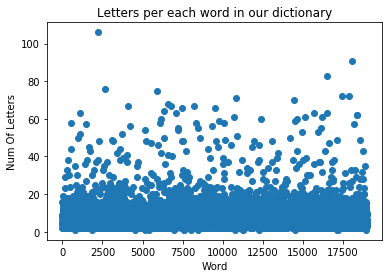

Time after first graph execute in (hh:mm:ss.ms): "0:00:05.134574"


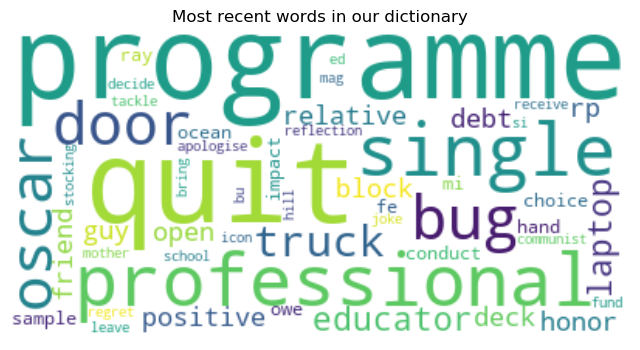

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.704048"
Time after lemmatization in (hh:mm:ss.ms): "0:00:00.200875"


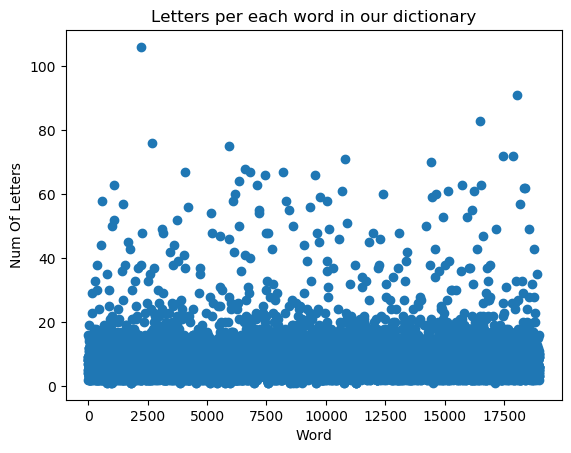

Time after first graph execute in (hh:mm:ss.ms): "0:00:04.579305"


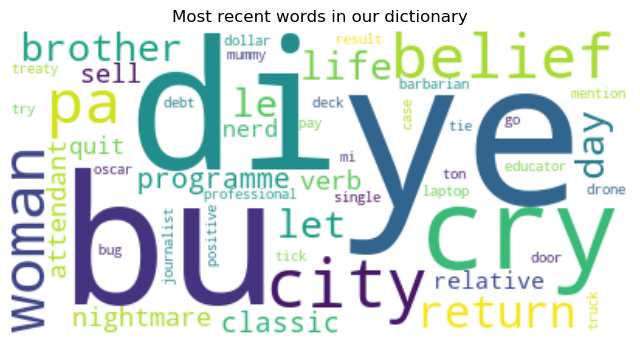

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.582106"
Time after stemming in (hh:mm:ss.ms): "0:00:00.538694"


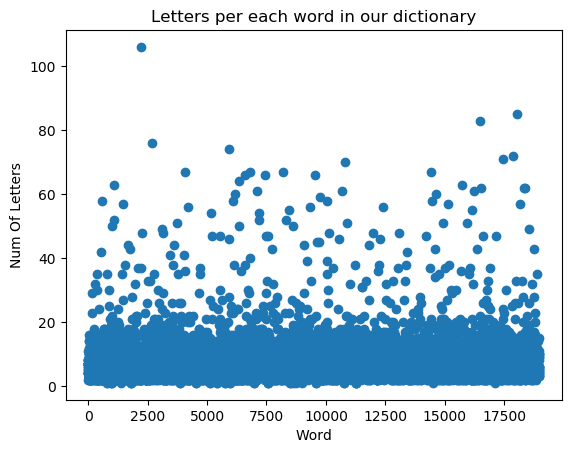

Time after first graph execute in (hh:mm:ss.ms): "0:00:03.505665"


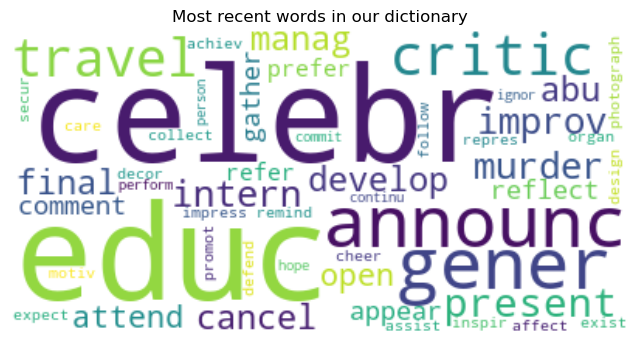

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.652863"
Time after spelling dictionary in (hh:mm:ss.ms): "0:26:51.070701"


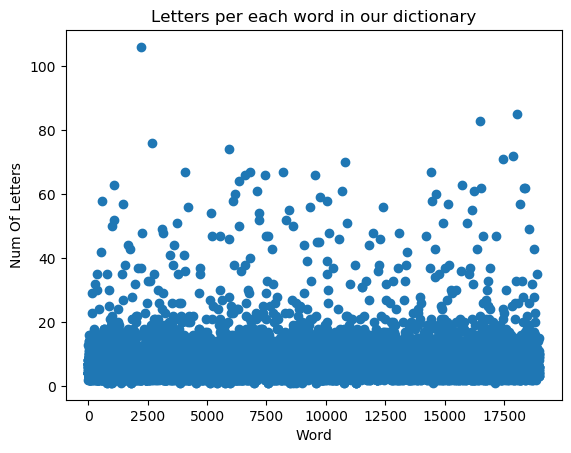

Time after first graph execute in (hh:mm:ss.ms): "0:00:03.226488"


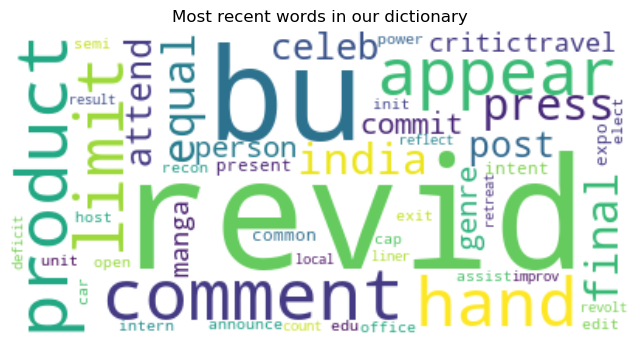

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.562874"
Lenght of second dictionary is:  13258
First try execute time:  0:27:14.870750


In [30]:
#First try
#4.1
first_time = datetime.now() 


my_dict = myDictFunc(ttw_after_first_cleaning)
firstGraph(my_dict)
wordcloudGraph(my_dict)

dic_after_lemma = myLemmatize(my_dict)
firstGraph(dic_after_lemma)
wordcloudGraph(dic_after_lemma)

dic_after_stemm = myStemm(dic_after_lemma)
firstGraph(dic_after_stemm)
wordcloudGraph(dic_after_stemm)

dic_after_spelling = mySpeller(dic_after_stemm)
firstGraph(dic_after_spelling)
wordcloudGraph(dic_after_spelling)

firstDict = set(dic_after_spelling)
first_time_final = datetime.now() - first_time
print('Lenght of second dictionary is: ', len(firstDict))
print('First try execute time: ', first_time_final)

Time after dict creation in (hh:mm:ss.ms): "0:00:03.808224"


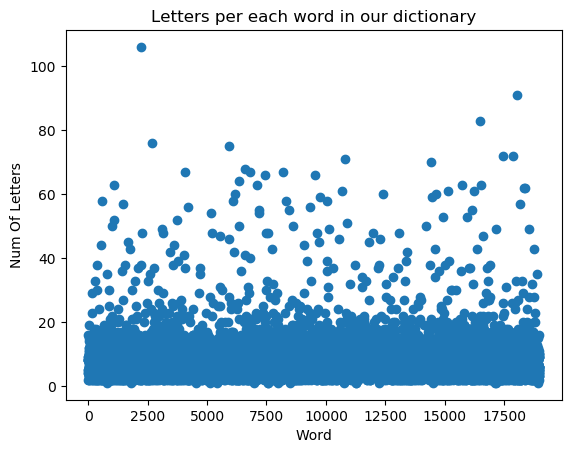

Time after first graph execute in (hh:mm:ss.ms): "0:00:04.615745"


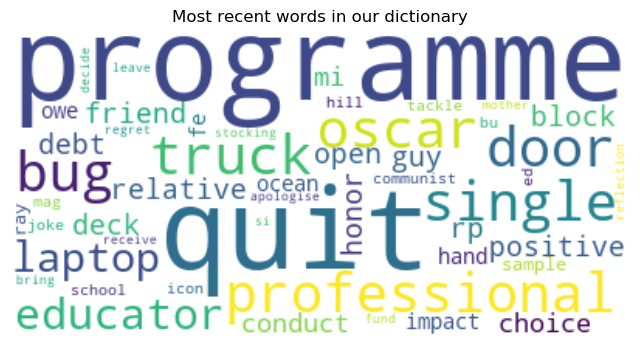

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.637302"
Time after lemmatization in (hh:mm:ss.ms): "0:00:00.163295"


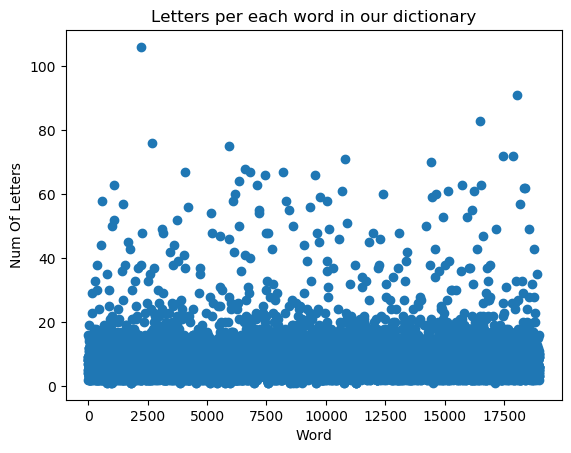

Time after first graph execute in (hh:mm:ss.ms): "0:00:04.273853"


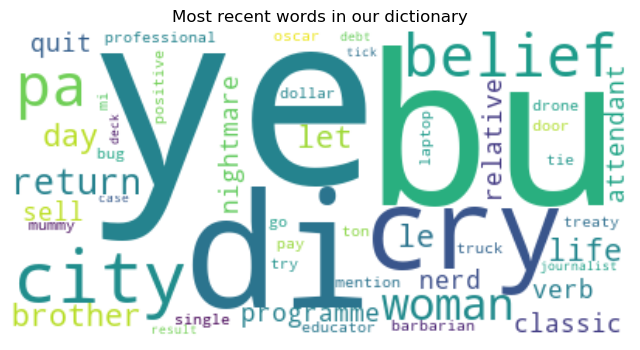

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.536438"
Time after spelling dictionary in (hh:mm:ss.ms): "0:25:19.430013"


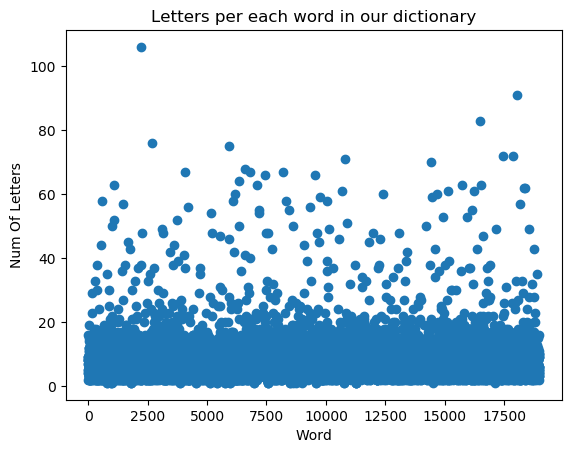

Time after first graph execute in (hh:mm:ss.ms): "0:00:04.281733"


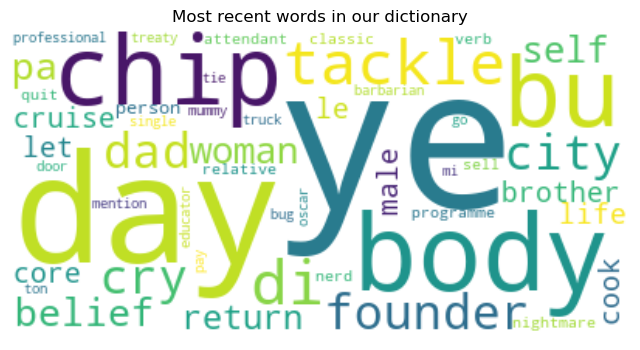

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.587710"
Time after stemming in (hh:mm:ss.ms): "0:00:00.536953"


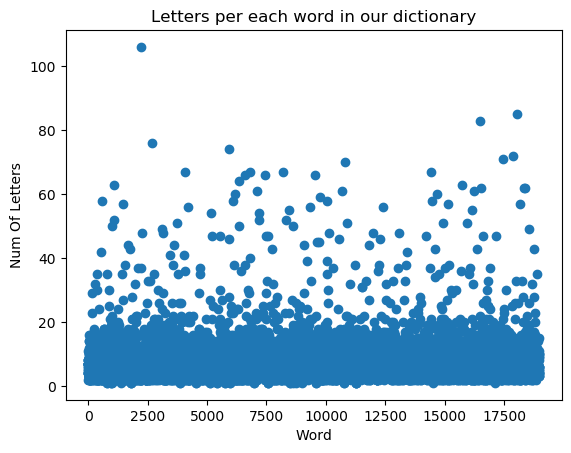

Time after first graph execute in (hh:mm:ss.ms): "0:00:03.354593"


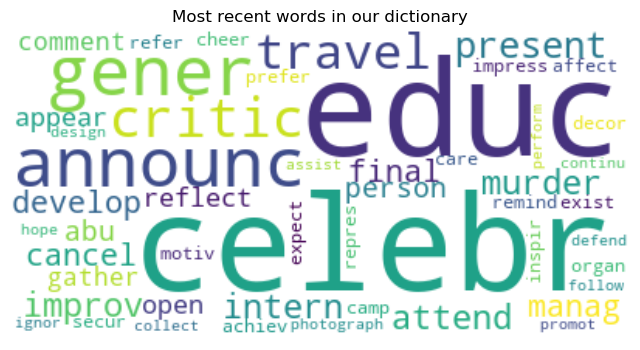

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.596261"
Lenght of second dictionary is:  14252
Second try execute time:  0:25:42.823125


In [31]:
#Second try
second_time = datetime.now() 

my_dict2 = myDictFunc(ttw_after_first_cleaning)

firstGraph(my_dict2)
wordcloudGraph(my_dict2)

dic_after_lemma2 = myLemmatize(my_dict2)
firstGraph(dic_after_lemma2)
wordcloudGraph(dic_after_lemma2)

dic_after_spelling2 = mySpeller(dic_after_lemma2)
firstGraph(dic_after_spelling2)
wordcloudGraph(dic_after_spelling2)


dic_after_stemm2 = myStemm(dic_after_spelling2)
firstGraph(dic_after_stemm2)
wordcloudGraph(dic_after_stemm2)

secondDict = set(dic_after_stemm2)
second_time_final = datetime.now() - second_time
print('Lenght of second dictionary is: ', len(secondDict))
print('Second try execute time: ', second_time_final)

Time after dict creation in (hh:mm:ss.ms): "0:00:03.799074"


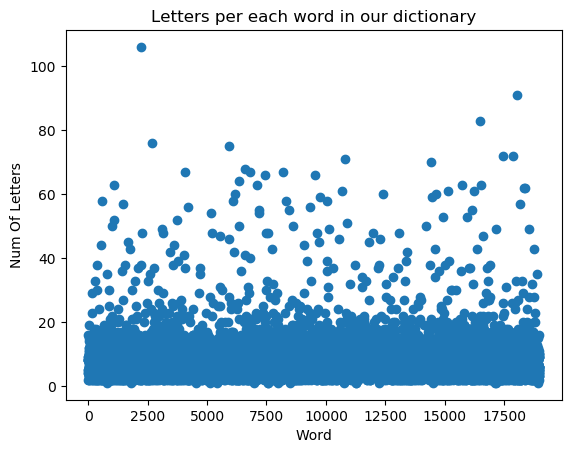

Time after first graph execute in (hh:mm:ss.ms): "0:00:04.567764"


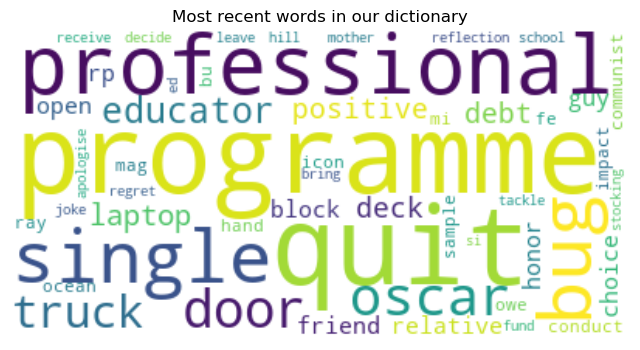

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.641876"
Time after spelling dictionary in (hh:mm:ss.ms): "0:25:21.312909"


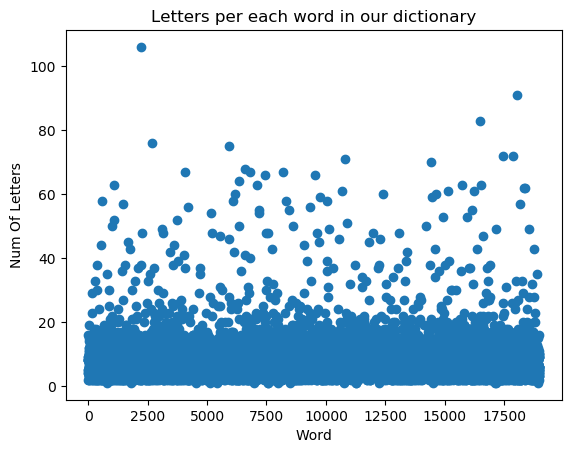

Time after first graph execute in (hh:mm:ss.ms): "0:00:04.921216"


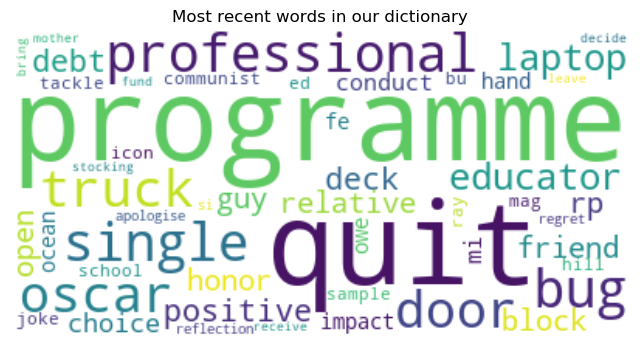

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.687136"
Time after lemmatization in (hh:mm:ss.ms): "0:00:00.259334"


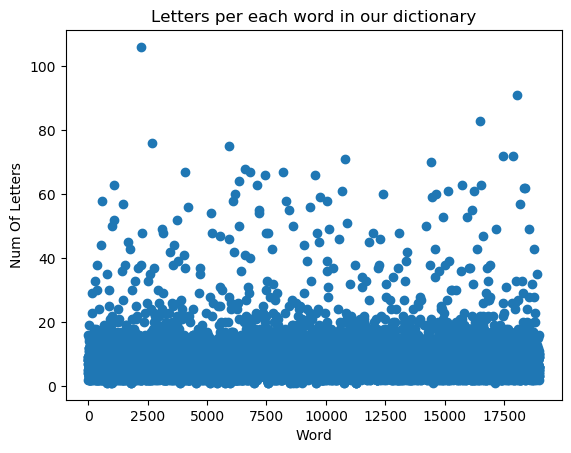

Time after first graph execute in (hh:mm:ss.ms): "0:00:04.571223"


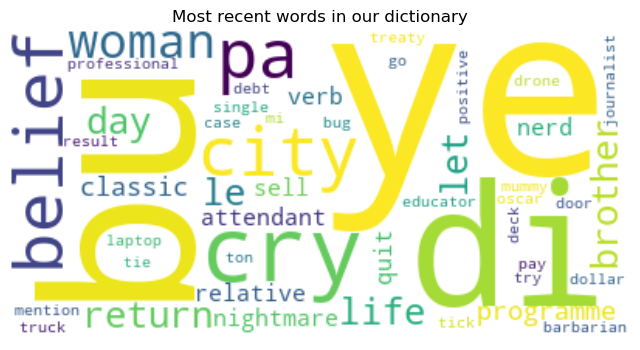

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.549450"
Time after stemming in (hh:mm:ss.ms): "0:00:00.591743"


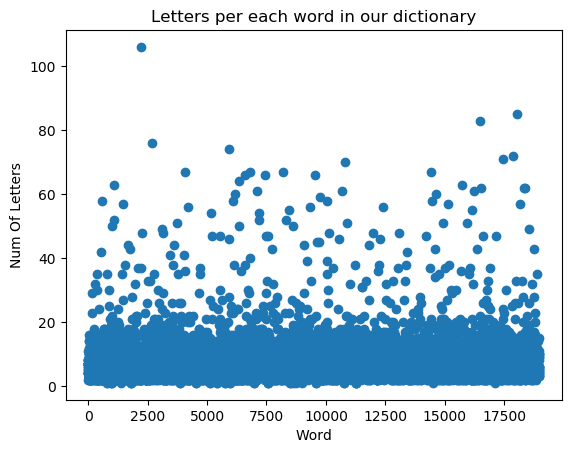

Time after first graph execute in (hh:mm:ss.ms): "0:00:03.524551"


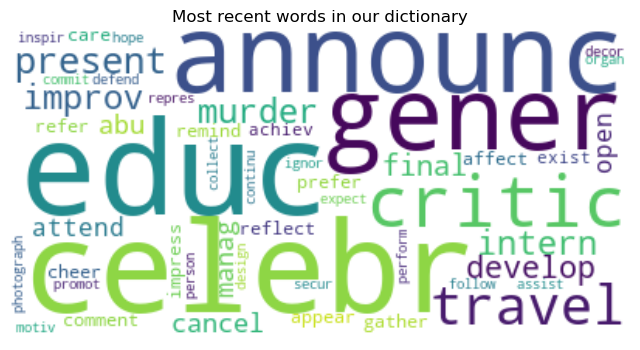

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.601909"
Lenght of third dictionary is:  14289
Third try execute time:  0:25:46.043796


In [32]:
#Third try

third_time = datetime.now() 

my_dict3 = myDictFunc(ttw_after_first_cleaning)

firstGraph(my_dict3)
wordcloudGraph(my_dict3)

dic_after_spelling3 = mySpeller(my_dict3)
firstGraph(dic_after_spelling3)
wordcloudGraph(dic_after_spelling3)


dic_after_lemma3 = myLemmatize(dic_after_spelling3)
firstGraph(dic_after_lemma3)
wordcloudGraph(dic_after_lemma3)

dic_after_stemm3 = myStemm(dic_after_lemma3)
firstGraph(dic_after_stemm3)
wordcloudGraph(dic_after_stemm3)

thirdDict = set(dic_after_stemm3)
third_time_final = datetime.now() - third_time
print('Lenght of third dictionary is: ', len(thirdDict))
print('Third try execute time: ', third_time_final)

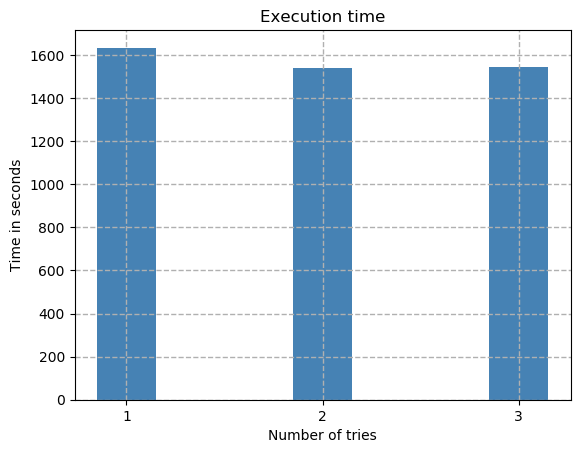

In [33]:
#Summary part 3.2

l = [first_time_final.seconds,second_time_final.seconds,third_time_final.seconds]
x = np.arange(len(l))
plt.bar(x+1,l,width = 0.3, color = 'steelblue')
plt.grid( linestyle='--', linewidth=1)
plt.xlabel('Number of tries')
plt.ylabel('Time in seconds')
plt.xticks([1,2,3])
plt.title('Execution time')
plt.yticks()
plt.style.use('default')
plt.show()

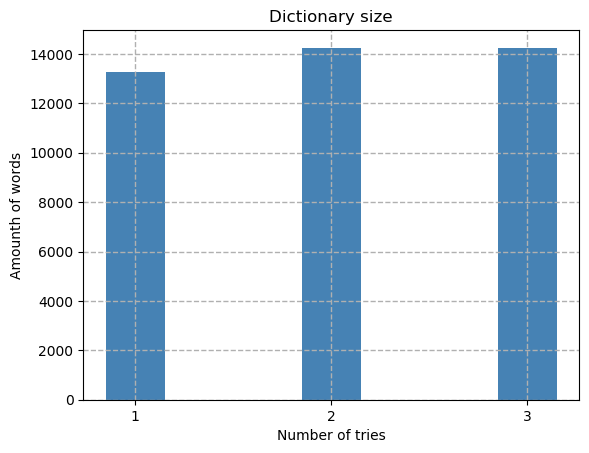

In [34]:
#Summary part 3.2

l2 = [len(firstDict),len(secondDict),len(secondDict)]
x = np.arange(len(l))
plt.bar(x+1,l2,width = 0.3, color = 'steelblue')
plt.grid( linestyle='--', linewidth=1)
plt.xlabel('Number of tries')
plt.ylabel('Amounth of words')
plt.xticks([1,2,3])
plt.title('Dictionary size')
plt.yticks()
plt.style.use('default')
plt.show()

Under those graphs we can see that our first try take more time to execute code but on the second graph we can see that first try cause less words in our dictionary, when two other tries give us more and the same number of words. So we take first algoritm to obtain the most suitable dictionary.

In [35]:
print('Time after whole checkings are done in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_program))

Time after whole checkings are done in (hh:mm:ss.ms): "1:18:58.311754"


# Part 2

In [36]:
import pandas as pd
import os
import collections
import time
from datetime import datetime 
import pickle

### -->data

In [37]:
df = ttw_after_first_cleaning
# wordList= ["user", "run", "love", "google","absabs"," ","#","@","best","."]
wordList = firstDict


print("data load")

data load


## Matrix Build

In [38]:
class matrix:
    def __init__(self,df,wordList,id_len=100):
        
        self.df=df
        self.wordList=wordList
        self.id_len=id_len        
  
        # Convert the dictionary into DataFrame 
        self.new_df = pd.DataFrame( [[bool(False)]*len(wordList)]*id_len )
        self.new_df.columns = wordList
        
        
        ID=0
        for tweet in df["tweet"][:id_len]:
            tokens = tweet.split()
            for token in tokens:
                if token in wordList:
                    self.new_df[token][ID]=bool(True)
            ID += 1
            
        
        #2.1.1
        print("")
        print("#2.1.1")
        self.new_df.to_csv('out.csv', index=False)
        print("file out.csv saved ")
        self.new_df.T.to_csv('out_T.csv', index=True)
        print("file out_T.csv saved ")
        
        

        
        #2.1.2
        print("")
        print("#2.1.2")
        print("File out.csv size : ",os.path.getsize('out.csv'),"Byte")
        print("File out_T.csv size : ",os.path.getsize('out_T.csv'),"Byte")
        
        
        
        #2.1.3
        print("")
        print("#2.1.3")
        
        #print(self.new_df.value_counts())
#         for word in self.new_df:
#             print(self.new_df[word].value_counts())      
                
        print("")
        print("")
        print(self.new_df.head(100))
                        
    
    def And(self, words_list=[]):
        """
        works like set operator "intersection"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by intersection-operrator
        """
        set_dict={}
        for word in words_list:
            if word not in self.new_df:
                return "No match"

            tempData=(self.new_df[word].loc[self.new_df[word]==True]).index

            set_dict[word]=set(tempData.values)

        result=None
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]

            else:
                result = (set(result)).intersection(set(set_dict[word]))
                
  
            new_result=[]
    
            for index in result:
                new_result.append(index + 1)
       
        return new_result
       
    def Or(self, words_list):
        """
        works like set operator "union"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by union-operrator
        """
        set_dict={}
        for word in words_list:
            if word not in self.new_df:
                return "No match"
            
            tempData=(self.new_df[word].loc[self.new_df[word]==True]).index
            
            set_dict[word]=set(tempData.values)
            
            #set_dict[word]=[set(self.new_df[word])]
        
        
        result=None
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]
 
            else:
                result = (set(result)).union(set(set_dict[word]))
                    
            new_result=[]
            for index in result:
                new_result.append(index + 1)
        
        return new_result
        
    def Not(self, words_list):
        """
        works like set operator "difference"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by difference-operrator
        """
        set_dict={}
        for word in words_list:
            if word not in self.new_df:
                return "No match"
            tempData=(self.new_df[word].loc[self.new_df[word]==True]).index
            
            set_dict[word]=set(tempData.values)
            
        result=None
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]
 
            else:
                result = (set(result)).difference(set(set_dict[word]))
            
            new_result=[]
            
            for index in result:
                new_result.append(index + 1)
                
        return new_result


## Reverse indexes

In [39]:
class Reverse_indexes:
    def __init__(self,df,wordList,id_len):
        
        self.df=df
        self.wordList=wordList
        self.id_len=id_len
        
        self.new_df=pd.read_csv('out.csv')
        
        # {"word": [ amount, { "id": [ amount, { "place_1": place } ] } ] }
        
        word_place={}
        
        # Convert the dictionary into DataFrame
        
        #self.linked_lst = collections.deque()
        
        
        
#         ID=0
#         for tweet in df["tweet"][:id_len]:
#             ID += 1
#             total_amount=0
#             amount_per_tweet=0
            
            
            
# #             print("ID ===> ",ID)
# #             print("tweet ===> ",tweet)

            
            
            
#             if(type(tweet) != float):
#                 tokens = tweet.split()
#             #print(type(tokens))
        
            
#             for token in set(tokens):
#                 if token in wordList:
                    
#                     #
#                     # set_dict[word]=set(tempData.values)
#                     #
#                     # len(test)
#                     #
#                     # data = df.loc[df.cell == id]
#                     # rows = df.index
#                     #
#                     #
                    
#                     tempData=(self.new_df[token].loc[self.new_df[token]==True]).index
                    
#                     #list of tweets wich contains word
                    
#                     tempData=list(np.asarray(tempData) + 1)
#                     # print("tempData => ",tempData)
                    
#                     # amount of tweets wich contains word
#                     amount_per_file=len(tempData)
#                     # print("amount_per_file => ",amount_per_file)
                    

                
# #                 print(type({(np.where(np.array(tokens)==token)[0]).tolist}))
# #                 print((np.where(np.array(tokens)==token)[0]).tolist)

#         print("ver 1 Done")


#         ########################## ver 2
#         #for tweet in df["tweet"][:id_len]:
#         #print(df["tweet"][:id_len])
        
#         #print((df["tweet"][:id_len]).values)
        
#         df=df[df["tweet"].notnull()]
        
#         split_test=(df["tweet"][:id_len]).values
        
     
        
# #         print(split_test)
        
# #         print("________________________")
# #         print(type((df["tweet"][:id_len]).values))
        
# #         print("________________________")
# #         print("________________________")
# #         print(np.array_split(split_test,1))
        
# #         print("________________________")
# #         print("________________________")
# #         print("________________________")
# #         print("________________________")
# #         print(type(np.array_split(split_test,1)))
        
#         #print(' '.join(list((np.array_split(split_test,1))[0])))
#         new_word_list=set((' '.join(list((np.array_split(split_test,1))[0]))).split())
#         #TEST=set(np.split((df["tweet"][:id_len]).values))
        
#         # print(new_word_list)
        
#         #print(TEST)
    
#         print("ver 2 Done")     
        
        self.ver_3_dict={}
        for token in wordList:
                tempData=(self.new_df[token].loc[self.new_df[token]==True]).index
                    
                #list of tweets wich contains word
                tempData=list(np.asarray(tempData) + 1)
                #print("tempData => ",tempData)
                    
                # amount of tweets wich contains word
                amount_per_file=len(tempData)
                    # print("amount_per_file => ",amount_per_file)
                   
                self.ver_3_dict[token]=[len(tempData),dict.fromkeys(tempData, 0)]
                
                for place_list in self.ver_3_dict[token][1].keys():
#                     df["tweet"][place_list-1]
                    #print(df["tweet"][place_list-1])
    
                    index_list=[m.start() for m in re.finditer(token, df["tweet"][place_list-1])]
        
                    self.ver_3_dict[token][1][place_list] = [(df["tweet"][place_list-1]).count(token), index_list]
        
                    
                    #[0, 5, 10, 15]
        
        
                    #if token == "user":
                        #print(place_list)
                        
                
                        #print((df["tweet"][place_list-1]).count(token))
                
                
        #print("***********************************************************")        
        #print(self.ver_3_dict)
        print(self.ver_3_dict["user"][1])
        
        
        
                    
        print("ver 3 Done")
        
        
        
        
        
        print("#2.1.1")
        afile = open('out.pkl', 'wb')
        pickle.dump(self.ver_3_dict, afile)
        afile.close()
        print("File out.pkl saved")
        #print(self.ver_3_dict)

        print("#2.1.2")
        print("File out.pkl size : ",os.path.getsize('out.pkl'),"Byte")
        
        print("#2.1.3")
        print("Has only useful information")
    
    
    def And(self, words_list=[]):
        """
        works like set operator "intersection"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by intersection-operrator
        """
        set_dict={}
        for word in words_list:
            if word not in self.ver_3_dict.keys():
                return "No match"

            set_dict[word]=set(self.ver_3_dict[word][1].keys())

        result=None
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]

            else:
                result = (set(result)).intersection(set(set_dict[word]))
                
  
            new_result=[]
    
            for index in result:
                new_result.append(index)
       
        return new_result
    
    def And_2(self, words_list=[]):
        """
        works like set operator "intersection"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by intersection-operrator
        """
        set_dict={}
        word_count_dict={}
        
        for word in set(words_list):
            
            word_count_dict[word]=words_list.count(word)
            
            
            if word not in self.ver_3_dict.keys():
                return "No match"
            
            
            
            
            
            #for
#             print(self.ver_3_dict[word][1].keys())
            
            set_dict[word]=[]
            
            for key in self.ver_3_dict[word][1].keys():
                #if key+1 > self.ver_3_dict[word][1][key][0]:
                if word_count_dict[word] < self.ver_3_dict[word][1][key][0]+1:
                    set_dict[word].append(key)
                   
            
            
            
        result=None
        
        dif_word_count={}
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]

            else:
                result = (set(result)).intersection(set(set_dict[word]))
                
  
            new_result=[]
    
            for index in result:
                new_result.append(index)
       
        return new_result
    
    def Or(self, words_list=[]):
        """
        works like set operator "intersection"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by intersection-operrator
        """
        set_dict={}
        for word in words_list:
            if word not in self.ver_3_dict.keys():
                return "No match"

            set_dict[word]=set(self.ver_3_dict[word][1].keys())

        result=None
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]

            else:
                result = (set(result)).union(set(set_dict[word]))
                
  
            new_result=[]
    
            for index in result:
                new_result.append(index)
       
        return new_result
    
    def Or_2(self, words_list=[]):
        """
        works like set operator "intersection"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by intersection-operrator
        """
        set_dict={}
        word_count_dict={}
        
        for word in set(words_list):
            
            word_count_dict[word]=words_list.count(word)
            
            
            if word not in self.ver_3_dict.keys():
                return "No match"
            

            set_dict[word]=set(self.ver_3_dict[word][1].keys())
            
#             for key in self.ver_3_dict[word][1].keys():
#                 if word_count_dict[word] < self.ver_3_dict[word][1][key][0]+1:
#                     set_dict[word].append(key)
                

            
        result=None
        
        dif_word_count={}
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]

            else:
                result = (set(result)).union(set(set_dict[word]))
                
  
            new_result=[]
    
            for index in result:
                new_result.append(index)
       
        return new_result
    
    
    def Not(self, words_list=[]):
        """
        works like set operator "intersection"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by intersection-operrator
        """
        set_dict={}
        word_count_dict={}
        for word in set(words_list):
            word_count_dict[word]=words_list.count(word)
            if word not in self.ver_3_dict.keys():
                set_dict[word]=[]
            else:
                set_dict[word]=set(self.ver_3_dict[word][1].keys())
                if words_list.count(word) > 1:
                    set_dict[word]=[]
                

        result=None
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]

            else:
                result = (set(result)).difference(set(set_dict[word]))
                
  
            new_result=[]
    
            for index in result:
                new_result.append(index)
       
        return new_result
    
    def Not_2(self, words_list=[]):
        """
        works like set operator "intersection"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by intersection-operrator
        """
        set_dict={}
        word_count_dict={}
        for word in set(words_list):
            word_count_dict[word]=words_list.count(word)
            if word not in self.ver_3_dict.keys():
                set_dict[word]=[]
            else:
                set_dict[word]=set(self.ver_3_dict[word][1].keys())
                if words_list.count(word) > 1:
                    set_dict[word]=[]
            
        result=None
        
        dif_word_count={}
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]

            else:
                result = (set(result)).difference(set(set_dict[word]))
                
  
            new_result=[]
    
            for index in result:
                new_result.append(index)
       
        return new_result
                    



## Prints

In [40]:
def to_integer(dt_time):
    #print(dt_time.days)
    #print(type(dt_time))
    print(dt_time.days)
    return 100000*dt_time.days + 1000*dt_time.seconds + dt_time.microseconds

In [41]:
time_dict={"M1":{"Create":0,"find":0,"And":0,"Or":0},
           "M2":{"Create":0,"find":0,"And":0,"Or":0},
           "R1":{"Create":0,"find":0,"And":0,"Or":0,"find_2":0,"And_2":0,"Or_2":0},
           "R2":{"Create":0,"find":0,"And":0,"Or":0,"find_2":0,"And_2":0,"Or_2":0}
          }

size_dict={"1":{"out.csv":None,"out_T.csv":None,"out.pkl":None},
           "2":{"out.csv":None,"out_T.csv":None,"out.pkl":None}
          }

In [42]:
print("")
print("Matrix : len 100")
print("")

start_time = datetime.now()
M1=matrix(df,wordList,id_len=100)
time_dict["M1"]["Create"]=to_integer(datetime.now() - start_time)
size_dict["1"]["out.csv"]=os.path.getsize('out.csv')
size_dict["1"]["out_T.csv"]=os.path.getsize('out_T.csv')

print("")
print("Reverse indexes : len 100")
print("")

start_time = datetime.now()
R1=Reverse_indexes(df,wordList,100)
time_dict["R1"]["Create"]=to_integer(datetime.now() - start_time)
size_dict["1"]["out.pkl"]=os.path.getsize('out.pkl')


Matrix : len 100


#2.1.1
file out.csv saved 
file out_T.csv saved 

#2.1.2
File out.csv size :  8068445 Byte
File out_T.csv size :  8081894 Byte

#2.1.3


    chancery  burst   init     sh  manipulationlawless  shitload  sonic  \
0      False  False  False  False                False     False  False   
1      False  False  False  False                False     False  False   
2      False  False  False  False                False     False  False   
3      False  False  False  False                False     False  False   
4      False  False  False  False                False     False  False   
..       ...    ...    ...    ...                  ...       ...    ...   
95     False  False  False  False                False     False  False   
96     False  False  False  False                False     False  False   
97     False  False  False  False                False     False  False   
98     False  False  False  False                False     False  False   
99     False  Fals

In [43]:
print("")
print("Matrix : len 1000")
print("")

start_time = datetime.now()
M2=matrix(df,wordList,id_len=1000)
time_dict["M2"]["Create"]=to_integer(datetime.now() - start_time)
size_dict["2"]["out.csv"]=os.path.getsize('out.csv')
size_dict["2"]["out_T.csv"]=os.path.getsize('out_T.csv')

print("")
print("Reverse indexes : len 1000")
print("")

start_time = datetime.now()
R2=Reverse_indexes(df,wordList,1000)
time_dict["R2"]["Create"]=to_integer(datetime.now() - start_time)
size_dict["2"]["out.pkl"]=os.path.getsize('out.pkl')


Matrix : len 1000


#2.1.1
file out.csv saved 
file out_T.csv saved 

#2.1.2
File out.csv size :  79658683 Byte
File out_T.csv size :  79674832 Byte

#2.1.3


    chancery  burst   init     sh  manipulationlawless  shitload  sonic  \
0      False  False  False  False                False     False  False   
1      False  False  False  False                False     False  False   
2      False  False  False  False                False     False  False   
3      False  False  False  False                False     False  False   
4      False  False  False  False                False     False  False   
..       ...    ...    ...    ...                  ...       ...    ...   
95     False  False  False  False                False     False  False   
96     False  False  False  False                False     False  False   
97     False  False  False  False                False     False  False   
98     False  False  False  False                False     False  False   
99     False  F

## Find

In [44]:
start_time = datetime.now() 
print("M1.And(user)",M1.And(["user"]))

time_dict["M1"]["find"]=to_integer(datetime.now() - start_time)


start_time = datetime.now() 
print("M2.And(user)",M2.And(["user"]))

time_dict["M2"]["find"]=to_integer(datetime.now() - start_time)

start_time = datetime.now() 
print("R1.And(user)",R1.And(["user"]))

time_dict["R1"]["find"]=to_integer(datetime.now() - start_time)

start_time = datetime.now() 
print("R2.And(user)",R2.And(["user"]))

time_dict["R2"]["find"]=to_integer(datetime.now() - start_time)

start_time = datetime.now() 
print("R1.And_2(user)",R1.And_2(["user"]))

time_dict["R1"]["find_2"]=to_integer(datetime.now() - start_time)

start_time = datetime.now() 
print("R2.And_2(user)",R2.And_2(["user"]))

time_dict["R2"]["find_2"]=to_integer(datetime.now() - start_time)

M1.And(user) [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]
0
M2.And(user) [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96, 103, 108, 109, 110, 112, 114, 115, 123, 130, 138, 141, 142, 144, 148, 149, 155, 162, 166, 167, 168, 172, 173, 174, 178, 180, 186, 188, 199, 203, 206, 207, 211, 214, 216, 217, 220, 221, 224, 225, 237, 238, 245, 247, 251, 253, 258, 264, 267, 269, 273, 280, 282, 285, 286, 292, 293, 297, 299, 301, 302, 306, 307, 312, 316, 320, 322, 326, 329, 333, 336, 339, 342, 344, 347, 349, 351, 354, 356, 358, 364, 371, 375, 378, 379, 387, 388, 389, 395, 396, 397, 399, 401, 403, 406, 408, 409, 412, 418, 419, 421, 423, 433, 434, 441, 443, 445, 456, 458, 459, 460, 464, 466, 470, 473, 479, 481, 482, 490, 494, 500, 503, 504, 507, 509, 510, 511, 516, 517, 518, 522, 528, 532, 535, 536, 537, 539, 540, 541, 542, 545, 549,

In [45]:
start_time = datetime.now() 
print("M1.And(school)",M1.And(["school"]))
#time_dict["M1"]["And"]=datetime.now() - start_time

start_time = datetime.now() 
print("M2.And(school)",M2.And(["school"]))
#time_dict["M2"]["And"]=datetime.now() - start_time

start_time = datetime.now() 
print("R1.And(school)",R1.And(["school"]))
#time_dict["R1"]["And"]=datetime.now() - start_time

start_time = datetime.now() 
print("R2.And(school)",R2.And(["school"]))
#time_dict["R2"]["And"]=datetime.now() - start_time

start_time = datetime.now() 
print("R1.And_2(school)",R1.And_2(["school"]))
#time_dict["R1"]["And"]=datetime.now() - start_time

start_time = datetime.now() 
print("R2.And_2(school)",R2.And_2(["school"]))
#time_dict["R2"]["And"]=datetime.now() - start_time


M1.And(school) [14, 8]
M2.And(school) [488, 528, 14, 8]
R1.And(school) [8, 14]
R2.And(school) [8, 488, 14, 528]
R1.And_2(school) [8, 14]
R2.And_2(school) [8, 14, 488, 528]


## AND

In [46]:
start_time = datetime.now() 
print("M1.And(user school)",M1.And(["user","school"]))
time_dict["M1"]["And"]=to_integer(datetime.now() - start_time)

start_time = datetime.now() 
print("M2.And(user school)",M2.And(["user","school"]))
time_dict["M2"]["And"]=to_integer(datetime.now() - start_time)

start_time = datetime.now() 
print("R1.And(user school)",R1.And(["user","school"]))
time_dict["R1"]["And"]=to_integer(datetime.now() - start_time)

start_time = datetime.now() 
print("R2.And(user school)",R2.And(["user","school"]))
time_dict["R2"]["And"]=to_integer(datetime.now() - start_time)

start_time = datetime.now() 
print("R1.And_2(user school)",R1.And_2(["user","school"]))
time_dict["R1"]["And_2"]=to_integer(datetime.now() - start_time)

start_time = datetime.now() 
print("R2.And_2(user school)",R2.And_2(["user","school"]))
time_dict["R2"]["And_2"]=to_integer(datetime.now() - start_time)


M1.And(user school) [14]
0
M2.And(user school) [14, 528]
0
R1.And(user school) [14]
0
R2.And(user school) [528, 14]
0
R1.And_2(user school) [14]
0
R2.And_2(user school) [528, 14]
0


## OR

In [47]:
start_time = datetime.now() 
print("M1.Or(love school)",M1.Or(["love","school"]))
time_dict["M1"]["Or"]=to_integer(datetime.now() - start_time)

start_time = datetime.now() 
print("M2.Or(love school)",M2.Or(["love","school"]))
time_dict["M2"]["Or"]=to_integer(datetime.now() - start_time)

start_time = datetime.now() 
print("R1.Or(love school)",R1.Or(["love","school"]))
time_dict["R1"]["Or"]=to_integer(datetime.now() - start_time)

start_time = datetime.now() 
print("R2.Or(love school)",R2.Or(["love","school"]))
time_dict["R2"]["Or"]=to_integer(datetime.now() - start_time)

start_time = datetime.now() 
print("R1.Or_2(love school)",R1.Or_2(["love","school"]))
time_dict["R1"]["Or_2"]=to_integer(datetime.now() - start_time)

start_time = datetime.now() 
print("R2.Or_2(love school)",R2.Or_2(["love","school"]))
time_dict["R2"]["Or_2"]=to_integer(datetime.now() - start_time)


M1.Or(love school) [97, 4, 8, 9, 14, 47, 52, 55, 27]
0
M2.Or(love school) [4, 8, 9, 268, 269, 14, 911, 528, 277, 27, 797, 798, 926, 163, 806, 811, 684, 47, 52, 55, 697, 825, 699, 828, 957, 447, 835, 453, 326, 585, 330, 332, 974, 337, 470, 473, 219, 222, 97, 741, 358, 488, 369, 118, 377, 891, 508]
0
R1.Or(love school) [97, 4, 8, 9, 14, 47, 52, 55, 27]
0
R2.Or(love school) [4, 8, 9, 268, 269, 14, 911, 528, 277, 27, 797, 798, 926, 163, 806, 811, 684, 47, 52, 55, 697, 825, 699, 828, 957, 447, 835, 453, 326, 585, 330, 332, 974, 337, 470, 473, 219, 222, 97, 741, 358, 488, 369, 118, 377, 891, 508]
0
R1.Or_2(love school) [97, 4, 8, 9, 14, 47, 52, 55, 27]
0
R2.Or_2(love school) [4, 8, 9, 268, 269, 14, 911, 528, 277, 27, 797, 798, 926, 163, 806, 811, 684, 47, 52, 55, 697, 825, 699, 828, 957, 447, 835, 453, 326, 585, 330, 332, 974, 337, 470, 473, 219, 222, 97, 741, 358, 488, 369, 118, 377, 891, 508]
0


In [48]:
print(time_dict)

{'M1': {'Create': 845417, 'find': 0, 'And': 15625, 'Or': 1998}, 'M2': {'Create': 254744, 'find': 0, 'And': 0, 'Or': 2998}, 'R1': {'Create': 480812, 'find': 0, 'And': 0, 'Or': 0, 'find_2': 0, 'And_2': 0, 'Or_2': 0}, 'R2': {'Create': 1007024, 'find': 0, 'And': 0, 'Or': 0, 'find_2': 0, 'And_2': 0, 'Or_2': 0}}


In [49]:
print(size_dict)

{'1': {'out.csv': 8068445, 'out_T.csv': 8081894, 'out.pkl': 465305}, '2': {'out.csv': 79658683, 'out_T.csv': 79674832, 'out.pkl': 661573}}


In [50]:
def MaxFun(data):
    Max=0
    for class_key in time_dict:
        for fun in time_dict[class_key]:
            if Max < time_dict[class_key][fun] and fun != "Create":
                Max=time_dict[class_key][fun]
    return Max     

## Plot for function run time


In [51]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

[[0, 15625, 1998], [0, 0, 2998], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


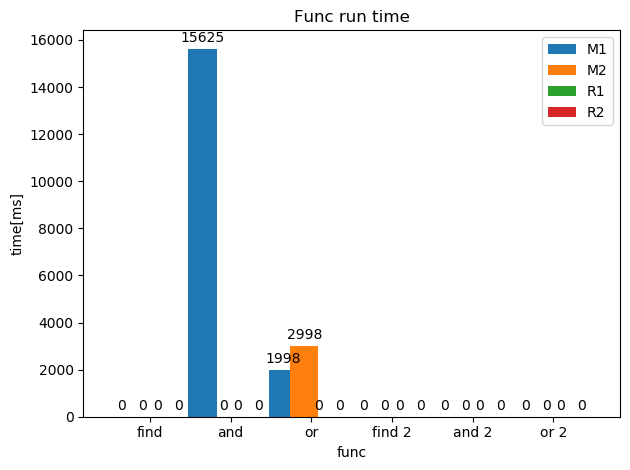

In [52]:

time_arr_all=[]
for kclass in time_dict.keys():
   
    time_arr=[]
    for key in (time_dict[kclass].keys()):
        if key !="Create":
            time_arr.append(time_dict[kclass][key])
    time_arr_all.append(time_arr)
print(time_arr_all)





labels = ['find', 'and', 'or', ]
labels1 = ['find', 'and', 'or', 'find 2','and 2','or 2']
time_arr_all[0].append(0)
time_arr_all[0].append(0)
time_arr_all[0].append(0)
time_arr_all[1].append(0)
time_arr_all[1].append(0)
time_arr_all[1].append(0)
M_1 = time_arr_all[0]
M_2 = time_arr_all[1]
R_1 = time_arr_all[2]
R_2 = time_arr_all[3]


x1 = np.arange(len(labels1))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x1 - width/1, M_1, width, label='M1')
rects2 = ax.bar(x1 - width/4, M_2, width, label='M2')
rects3 = ax.bar(x1 + width/4, R_1, width, label='R1')
rects4 = ax.bar(x1 + width/1, R_2, width, label='R2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('time[ms]')
ax.set_xlabel('func')
ax.set_title('Func run time')
ax.set_xticks(x1)
ax.set_xticklabels(labels1)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

### Conclusion

#### * 
func 2 only Reverse indexes opperators
#### 1) 
we get pretty good time for Matrix and Reverse indexes
#### 2)
Reverse indexes works faster becouse of it's structur


# Plot for creation run time

[[845417], [254744], [480812], [1007024]]


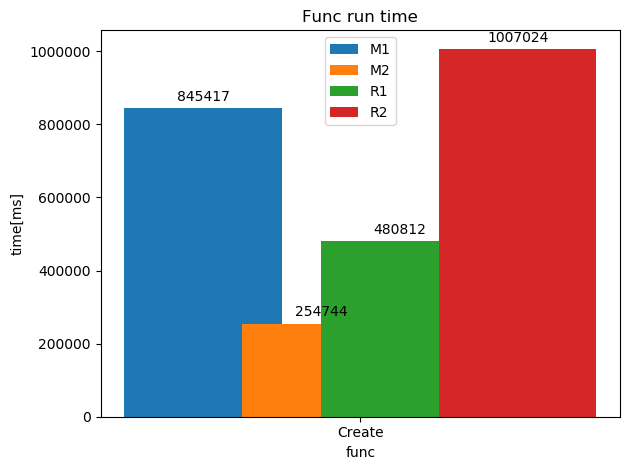

In [53]:

time_arr_all=[]
for kclass in time_dict.keys():
   
    time_arr=[]
    for key in (time_dict[kclass].keys()):
        if key =="Create":
            time_arr.append(time_dict[kclass][key])
    time_arr_all.append(time_arr)
print(time_arr_all)





labels = ["Create"]
labels1 = ["Create"]

M_1 = time_arr_all[0]
M_2 = time_arr_all[1]
R_1 = time_arr_all[2]
R_2 = time_arr_all[3]


x1 = np.arange(len(labels1))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x1 - width/1, M_1, width, label='M1')
rects2 = ax.bar(x1 - width/4, M_2, width, label='M2')
rects3 = ax.bar(x1 + width/4, R_1, width, label='R1')
rects4 = ax.bar(x1 + width/1, R_2, width, label='R2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('time[ms]')
ax.set_xlabel('func')
ax.set_title('Func run time')
ax.set_xticks(x1)
ax.set_xticklabels(labels1)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

### Conclusion

#### 1)
Reverse indexes works faster becouse it's struct stor only true values
and it also use part of matrix struct
#### 2)
for real test we need to separate between Matrix and Reverse indexes
#### *
sorry it takes long time to recompile the code 


# Plot for size of files

In [54]:
print(size_dict)

{'1': {'out.csv': 8068445, 'out_T.csv': 8081894, 'out.pkl': 465305}, '2': {'out.csv': 79658683, 'out_T.csv': 79674832, 'out.pkl': 661573}}


In [55]:
def MaxSize(data):
    Max=0
    for class_key in time_dict:
        for fun in time_dict[class_key]:
            if Max < time_dict[class_key][fun]:
                Max=time_dict[class_key][fun]
    return Max  

dict_values([8068445, 8081894, 465305])
dict_values([79658683, 79674832, 661573])


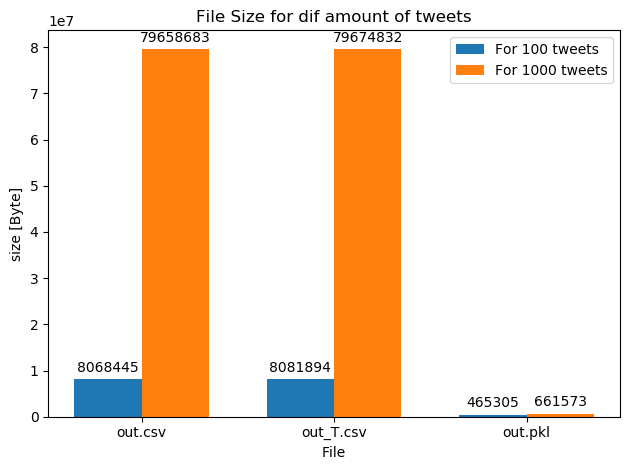

In [56]:







labels1 = ["out.csv","out_T.csv","out.pkl"]

T_1=size_dict["1"].values()
T_2=size_dict["2"].values()
print(T_1)
print(T_2)

x1 = np.arange(len(labels1))  # the label locations
#y1 = np.arange(range(0,MaxSize(size_dict),MaxSize(size_dict)/10))  
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x1 - width/2, T_1, width, label="For 100 tweets")
rects2 = ax.bar(x1 + width/2, T_2, width, label="For 1000 tweets")



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('size [Byte]')
ax.set_xlabel('File')
ax.set_title('File Size for dif amount of tweets')
#ax.set_yticks(y1)
ax.set_xticks(x1)
ax.set_xticklabels(labels1)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()

### Conclusion

#### 1)
Reverse indexes have best results becouse of it's struct and maybe also file format
#### 2)
size(DataFrame)==size(DataFrame_T)



In [57]:
print('Time after whole our work (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_program))

Time after whole our work (hh:mm:ss.ms): "1:19:33.137687"


#Part 4
#Summary

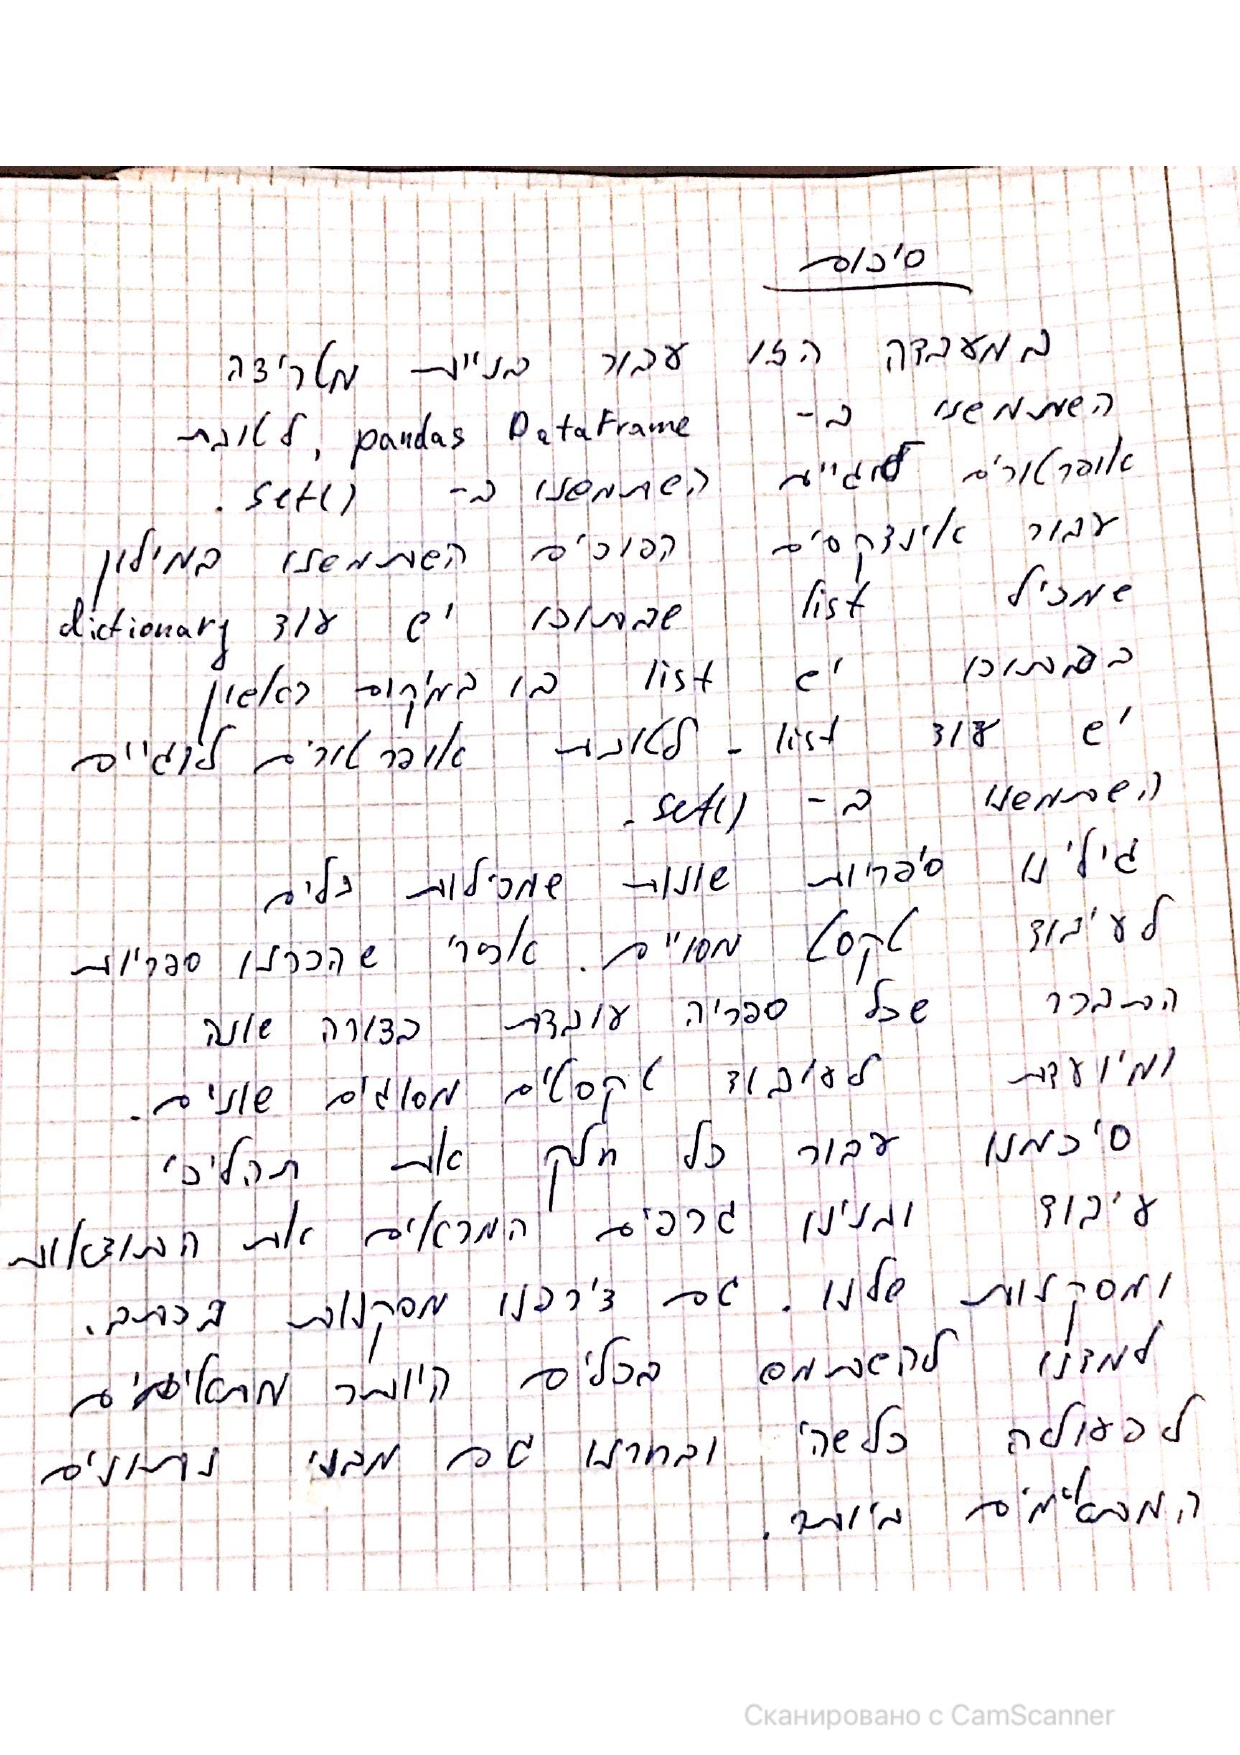

In [58]:
#4
#Summary
from IPython.display import Image
Image("Desktop\IR_Lab2_page-0001.jpg")